In [106]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Calibri'
matplotlib.rcParams['font.size'] = "18"

In [114]:
percentiles = [
    [7.873, 7.903, 7.908, 7.914, 7.938],
    [7.816, 7.898, 7.904, 7.910, 7.935],
    [7.847, 7.898, 7.904, 7.910, 7.933],
    [7.795, 7.900, 7.905, 7.911, 7.933],
    [5.123, 7.856, 7.873, 7.884, 7.917],
    [0.379, 7.703, 7.838, 7.871, 7.916],
    [0.000, 1.312, 2.815, 4.752, 7.808],
    [0.000, 7.820, 7.875, 7.893, 7.930]
]

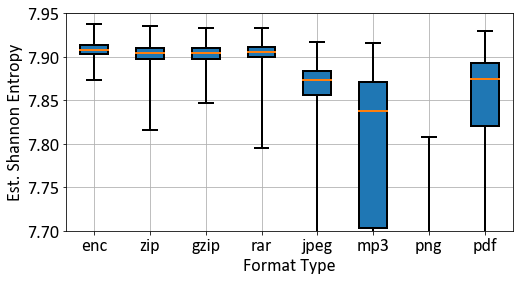

In [125]:
n_box = len(percentiles)
plt.figure(figsize=(8,4))
lw=2
box_plot = plt.boxplot([[-9, -4, 2, 4, 9],]*n_box,patch_artist=True,
        boxprops=dict(linewidth=lw),
        capprops=dict(linewidth=lw),
        whiskerprops=dict(linewidth=lw),
        flierprops=dict(linewidth=lw),
        medianprops=dict(linewidth=lw)) 
# Creates len(percentiles) no of box plots

min_y, max_y = float('inf'), -float('inf')

for box_no, pdata in enumerate(percentiles):
    if len(pdata) == 6:
        (q1_start, q2_start, q3_start, q4_start, q4_end, fliers_xy) = pdata
    elif len(pdata) == 5:
        (q1_start, q2_start, q3_start, q4_start, q4_end) = pdata
        fliers_xy = None
    else:
        raise ValueError("Percentile arrays for customized_box_plot must have either 5 or 6 values")

    # Lower cap
    box_plot['caps'][2*box_no].set_ydata([q1_start, q1_start])
    # xdata is determined by the width of the box plot

    # Lower whiskers
    box_plot['whiskers'][2*box_no].set_ydata([q1_start, q2_start])

    # Higher cap
    box_plot['caps'][2*box_no + 1].set_ydata([q4_end, q4_end])

    # Higher whiskers
    box_plot['whiskers'][2*box_no + 1].set_ydata([q4_start, q4_end])

    # Box
    path = box_plot['boxes'][box_no].get_path()
    path.vertices[0][1] = q2_start
    path.vertices[1][1] = q2_start
    path.vertices[2][1] = q4_start
    path.vertices[3][1] = q4_start
    path.vertices[4][1] = q2_start

    # Median
    box_plot['medians'][box_no].set_ydata([q3_start, q3_start])

    # Outliers
    if fliers_xy is not None and len(fliers_xy[0]) != 0:
        # If outliers exist
        box_plot['fliers'][box_no].set(xdata = fliers_xy[0],
                                       ydata = fliers_xy[1])

        min_y = min(q1_start, min_y, fliers_xy[1].min())
        max_y = max(q4_end, max_y, fliers_xy[1].max())

    else:
        min_y = min(q1_start, min_y)
        max_y = max(q4_end, max_y)

    # The y axis is rescaled to fit the new box plot completely with 10% 
    # of the maximum value at both ends
    #axes.set_ylim([min_y*1.1, max_y*1.1])
plt.ylim(7.700,7.950)
plt.xticks((1,2,3,4,5,6,7,8), ('enc', 'zip', 'gzip', 'rar', 'jpeg', 'mp3', 'png', 'pdf'))
plt.xlabel('Format Type')
plt.ylabel('Est. Shannon Entropy')
plt.grid()
plt.savefig('entro.pdf', bbox_inches='tight')